In [1]:
import pandas as pd
import matplotlib.pyplot
%matplotlib inline

![](https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png)

# 1. Pandas Recap

## 1.1 Pandas lets you **read**, **process** and **analyze tabular data**.
## 1.2 Pandas DataFrames
Pandas DataFrames are a **labeled** two-dimensional data structure and is similar in spirit to an Excel worksheet or a relational database table with labeled rows and columns.Typically,
* There can be multiple rows and columns in the data.
* Each row represents a sample of data.
* Each column contains a different variable that describes the samples (rows).
* The data in every column is usually the same type of data – e.g. numbers, strings, dates.


The DataFrame can be created in many different ways such as 
1. Using another DataFrame.
2. Using a NumPy array or a composite of arrays that has a two-dimensional shape.
3. Using Pandas Series.
4. Produced from a file, such as a CSV file.
5. From a dictionary of one-dimensional structure such as lists.

## 1.3 Exercise - Pandas Warmup

In [20]:
exam_data  = {
    'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, 6, 9, 20, 14.5, 7.5, 8, 19],
    'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1]
}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2
d,James,6.0,3
e,Emily,9.0,2
f,Michael,20.0,3
g,Matthew,14.5,1
h,Laura,7.5,1
i,Kevin,8.0,2
j,Jonas,19.0,1


### Solve the following steps:

1. Get the first 3 rows.
2. Get the columns 'name' and 'score'
3. Get the test score of Emily
4. Change the score in row 'd' to 11.5.
5. Select the rows where the number of attempts in the examination is greater than 2.
6. Select the rows the score is between 15 and 20 (inclusive).
7. Calculate the sum of the examination attempts by the students.
8. Calculate the average of the examination scores of the students.

#### Challenge
9. add a column 'quality' such that it is 'yes' if a student's score is 10 or above, and 'no' otherwise.

In [3]:
df.head()

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2
d,James,6.0,3
e,Emily,9.0,2


In [11]:
# Q1 - Enter code here
df.head(3)
df.iloc[:3]

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2


In [16]:
df['score']

a    12.5
b     9.0
c    16.5
d     6.0
e     9.0
f    20.0
g    14.5
h     7.5
i     8.0
j    19.0
Name: score, dtype: float64

In [18]:
df[df['name'] == 'Emily']['score']

e    9.0
Name: score, dtype: float64

In [23]:
# Q4 - Change the score in row 'd' to 11.5
df.loc['d', 'score'] = 11.5
df

,name,score,attempts
a,Anastasia,12.5,1
b,Dima,9.0,3
c,Katherine,16.5,2
d,James,11.5,3
e,Emily,9.0,2
f,Michael,20.0,3
g,Matthew,14.5,1
h,Laura,7.5,1
i,Kevin,8.0,2
j,Jonas,19.0,1


In [27]:
# Q5 - Select the rows where the number of attempts in the examination is greater than 2
df[df['attempts'] == 3]

,name,score,attempts
b,Dima,9.0,3
d,James,11.5,3
f,Michael,20.0,3


In [28]:
# Q6 - Select the rows the score is between 15 and 20 (inclusive)
df[(df['score'] >= 15) & (df['score'] <= 20 )]

,name,score,attempts
c,Katherine,16.5,2
f,Michael,20.0,3
j,Jonas,19.0,1


In [32]:
# Q7 - Calculate the sum of the examination attempts by the students.
df['attempts'].sum()

19

In [35]:
# Q8 - Enter code here
df['score'].mean()

12.75

In [37]:
df['score']

a    12.5
b     9.0
c    16.5
d    11.5
e     9.0
f    20.0
g    14.5
h     7.5
i     8.0
j    19.0
Name: score, dtype: float64

In [48]:
# Q9 - add a column 'quality' such that it is 'yes' if a student's score is 10 or above, and 'no' otherwise.
df['quality'] = df['score'].apply(lambda x: 'yes' if x >= 10 else 'no')

def halve(x):
    return x / 2 

def say_hello_to_score(x):
    return f'Hello, {x}!'

df['score'].apply(halve)

df['score'].apply(say_hello_to_score)

a    Hello, 12.5!
b     Hello, 9.0!
c    Hello, 16.5!
d    Hello, 11.5!
e     Hello, 9.0!
f    Hello, 20.0!
g    Hello, 14.5!
h     Hello, 7.5!
i     Hello, 8.0!
j    Hello, 19.0!
Name: score, dtype: object

In [45]:
df['score']

TypeError: 'int' object is not callable

# 2. Case Study: Kaggle's ML and DS Survey 2019

In [49]:
df = pd.read_csv('../data/multiple_choice_responses.csv')
df.head()

/home/jaidevd/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [50]:
df.shape

(19718, 246)

## 2.1 Any initial thoughts?

* rows -> answers, columns-> questions
* Make segments of people on kaggle
* educational background, gender survey
* popular databases
* Age time to solve?
* Age group of people with masters degree

## 2.2 Understanding the dataset
* ### How do we interpret the dimensions of the data?
* ### What is each row?
    1. [ ] A question in the survey
    2. [ ] An answer to a question in the survey
    3. [ ] A participant's response to the survey
    4. [ ] None of the above
* ### What is each column?
    1. [ ] A question in the survey
    2. [ ] The set of all answers to a given question
    3. [ ] Both of the above
    4. [ ] None of the above

In [51]:
# How do we get rows?
i = 0
df.loc[i]

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q2_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q3                                             In which country do you currently reside?
                                                             ...                        
Q34_Part_9                             Which of the following relational database pro...
Q34_Part_10                            Which of the following relational database pro...
Q34_Part_11                            Which of the following relational database pro...
Q34_Part_12                            Which of the following relational database pro...
Q34_OTHER_TEXT                         Which of the following relational database pro...
Name: 0, Length: 246,

In [52]:
# How do we get a list of columns?
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)

In [53]:
# How to select a particular column?
colname = 'Time from Start to Finish (seconds)'
df[colname]

0        Duration (in seconds)
1                          510
2                          423
3                           83
4                          391
                 ...          
19713                       84
19714                      473
19715                     9195
19716                      176
19717                      567
Name: Time from Start to Finish (seconds), Length: 19718, dtype: object

## Question: How is this column useful?
### (Hint: Remember that we are looking at survey responses!)

In [54]:
df[colname].min(), df[colname].max()

TypeError: '<=' not supported between instances of 'str' and 'int'

## Question: What went wrong?
### (Hint: Take a look at the first row)

In [55]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


### Checking the "type" of a column

In [56]:
df[colname].dtype

dtype('O')

In [61]:
duration = df[colname].iloc[1:]

In [58]:
duration.head()

1    510
2    423
3     83
4    391
5    392
Name: Time from Start to Finish (seconds), dtype: object

In [62]:
pd.to_numeric(duration)

1         510
2         423
3          83
4         391
5         392
         ... 
19713      84
19714     473
19715    9195
19716     176
19717     567
Name: Time from Start to Finish (seconds), Length: 19717, dtype: int64

In [59]:
duration_in_ints = duration.apply(lambda x: int(x))
duration_in_ints.head()

1    510
2    423
3     83
4    391
5    392
Name: Time from Start to Finish (seconds), dtype: int64

In [60]:
duration_in_ints = duration.astype(int)

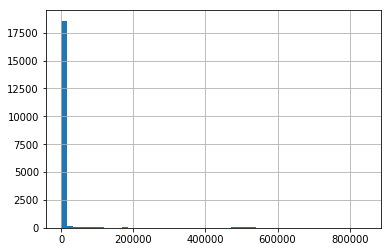

In [63]:
%matplotlib inline
ax = duration_in_ints.hist(bins=50)

# Filtering data
## Boolean indices

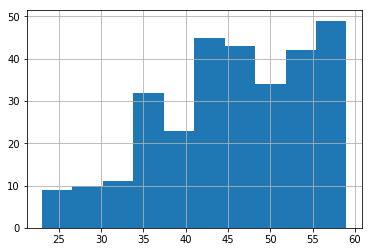

In [64]:
(duration_in_ints[duration_in_ints < 60]).hist()

## Filtering the data by column values

In [65]:
to_drop = duration_in_ints.index[duration_in_ints < 60]

In [66]:
to_drop

Int64Index([  151,  7844, 10526, 10654, 10696, 10705, 10711, 10740, 10938,
            11039,
            ...
            19613, 19617, 19622, 19630, 19632, 19662, 19674, 19682, 19696,
            19706],
           dtype='int64', length=298)

In [67]:
df.drop(to_drop, axis=0, inplace=True)

In [68]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [69]:
df.to_csv('../data/kaggle_clean.csv', index=False)